In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import time
import tracemalloc

In [13]:
file_path = r'C:\Users\Χριστόδουλος\Desktop\ML project\cleaned_energy_data.csv'
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df = df.drop(columns=['date'])

X = df.drop(columns=["Appliances"])
y = df["Appliances"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train['day_type'] = X_train['day_type'].astype('category')
X_test['day_type'] = X_test['day_type'].astype('category')

In [15]:
xgb = XGBRegressor(enable_categorical=True, tree_method="hist")

start_time = time.time()
tracemalloc.start()

xgb.fit(X_train, y_train)

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

y_pred = xgb.predict(X_test)

print(y_pred)

[ 51.81166   61.322235  47.849762  57.759506  48.402668  61.14481
  50.038807  43.86944   47.558544  59.064022  56.94801   52.471096
  55.46372   52.274036  49.859707  61.4872    49.681137  31.48573
  43.65936   53.571774  43.735367  42.35112   44.949566  26.630508
  41.44318   47.82014   53.65755   40.07342   69.46986   43.99285
  58.350292  66.11246   51.20563   52.926704  62.312126  67.31807
 107.66505   51.22737   46.383625]


In [16]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)
print("Training time (s):", end_time - start_time)
print("Memory usage (Bytes):", current)

RMSE: 13.820758727379259
MAE: 8.005701505220854
MAPE: 16.04536464770344
R^2: -0.5876029426691476
Training time (s): 1.2442255020141602
Memory usage (Bytes): 246400


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


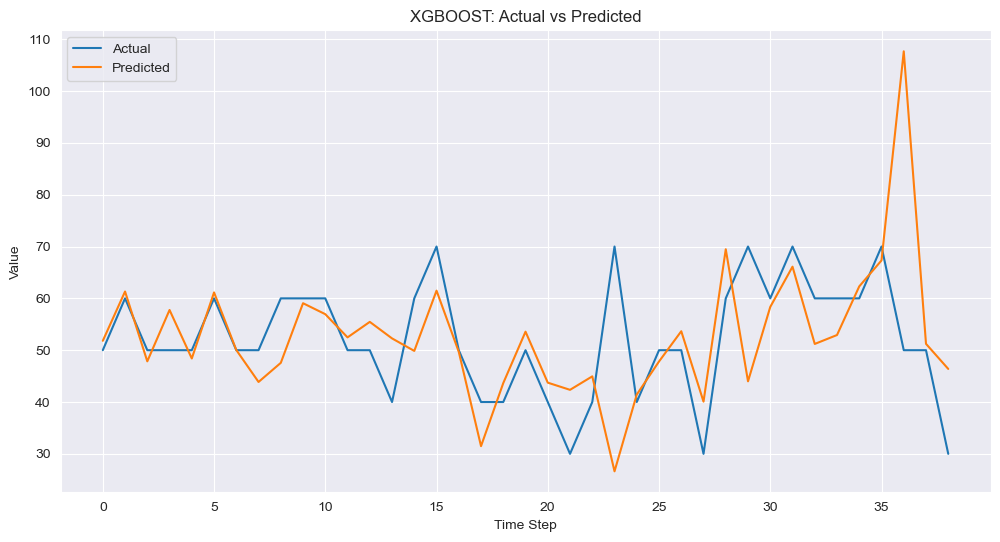

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')  # Ensure y_test is converted to NumPy array
plt.plot(y_pred.flatten(), label='Predicted')
plt.title('XGBOOST: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

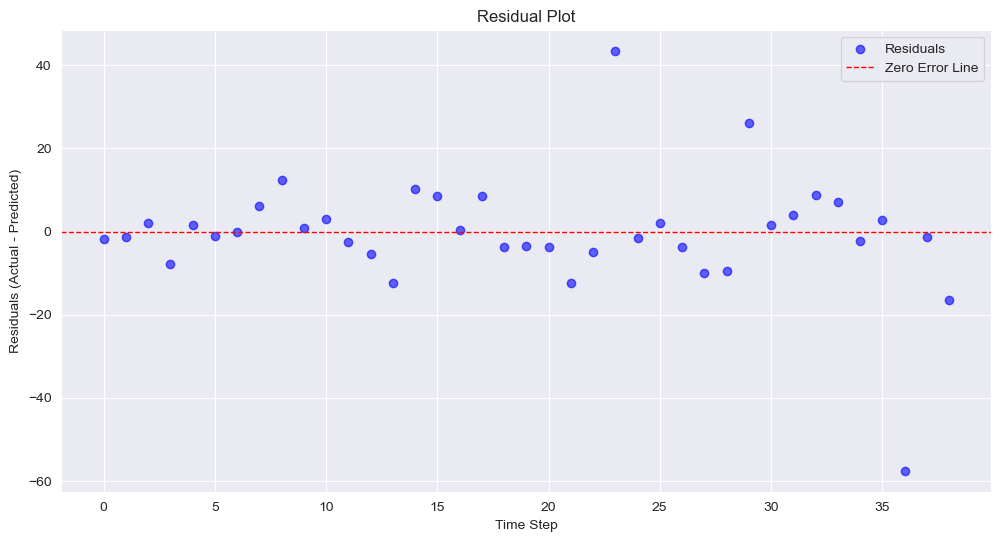

In [18]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Error Line')
plt.title('Residual Plot')
plt.xlabel('Time Step')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()